# Bilder Datensatz erstellen

Hier ist ein **[Link](https://towardsdatascience.com/how-do-you-know-you-have-enough-training-data-ad9b1fd679ee)**.

Das Bild der Schraube stammt aus einem Video, welches mit einem Iphone 12 pro aufgenommen wurde. 
Die Aufnahme ist sehr detailreich, das Pozidriv Profil sowie auch Beschädigungen, 
Rost und Ablagerungen auf der Oberfläche, sind gut zu erkennen.
Nachdem wir die Videos aufgenommen haben und die Softwareumgebung installiert ist, 
beginnen wir mit dem Python Programm zum Extrahieren von Bildern aus Videos:

:::{note}
Es stellt sich die Frage wie detailreich die Schraubenbilder sein müssen um eine gute Erkennung zu ermöglichen?
:::

## Extracting and Saving Video Frames using OpenCV-Python

In [ ]:
# OpenCV importieren:

import cv2



# path = 'relativer Speicherpfad / Dateiname':

path = 'pozi/pozi'



# Video laden:

cap = cv2.VideoCapture('pozi.MOV')
i = 0


# Prüfen ob ein Video geladen wurde:

if cap.isOpened() == False:
    print('ERROR: Datei nicht gefunden')

    
    
# Die Frames des Videos lesen:    
    
while(cap.isOpened()):
    ret, frame = cap.read()
     
    # sobald keine Frames mehr gelesen werden können (ret==False) wird abgebrochen:
    if ret == False:
        break
     
    # Die Frames speichern
    cv2.imwrite(path+str(i)+'.jpg', frame)
    i += 1
 

cap.release()
cv.destroyAllWindows()

### Resize Image

In [ ]:
import cv2

img = cv2.imread('pozi/pozi800.jpg', cv2.IMREAD_UNCHANGED)

print('Original Dimensions : ',img.shape)

scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

#resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
pwd

'C:\\Users\\Martin\\OneDrive\\Masterthesis_2022\\01_Dataset'

Der Datensatz dient zum Trainieren und Testen der künstlichen neuronalen Netze. Es gibt verschiedene Wege einen Datensatz von Schraubenbildern zu erzeugen:
 - virtuelle 3D Objekte mit Hilfe von CAD darstellen und daraus Bilder mit unterschiedlichen Ausrichtungen erzeugen
 - Schraubenbilder aus Herstellerkatalogen oder dem Internet extrahieren
 - Eigene Bilder mit einer Kamera anfertigen

In dieser Arbeit werden die letzteren beiden Varianten vorgestellt. Zunächst wird gezeigt, wie aus wenigen externen Bidern ein Datensatz künstlich erzeugt werden kann. Dieser künstlich erzeugte Daten besteht aus sehr wenigen Ursprungsbildern, die künstlich transformiert werden um somit weitere Bilder zu generieren. Die Transformation wird im Abschnitt "Datensatz aus wenigen Bildern" noch näher beschrieben.

## Datensatz aus wenigen Bildern

Dieser Erste Datensatz dient dazu, zu zeigen wie vorhandene Bilder künstlich leichten Veränderungen unterzogen werden können um somit dem Netz einen umfangreicheren Trainingssatz bereit zu stellen. Desweiteren werden in diesem künstlichen Datensatz lediglich verschiedene Schraubenkopfformen mit gleicher Ausrichtung verwendet. Die Folge ist ein Datensatz, der einfach genug ist um Regressionsmodelle zu Einstieg zu verwenden.

Als Einführung in das Thema Bilderkennung mit CNN's, wird eine einfache Bilderkennung mit Hilfe der Logistischen Regression erstellt. Die Log. Regr. ist sehr viel weniger leistungsfähig als ein CNN, aus diesem Grund wird ein einfacher Datensatz aus Symbol-Bildern von 5 Schraubenarten erstellt.

In [5]:
# importieren der Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

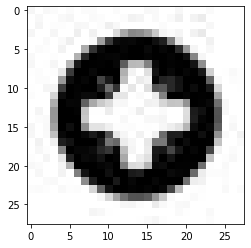

In [186]:
pozidriv = mpimg.imread('ImageDataset_folder/pozidriv 28x28_gray.jpg')
pozidriv = plt.imshow(pozidriv,cmap='gray')

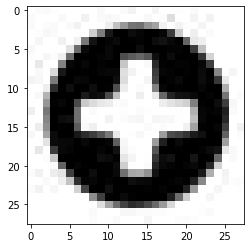

In [187]:
philips = mpimg.imread('ImageDataset_folder/philips 28x28_gray.jpg')
philips = plt.imshow(philips,cmap='gray')

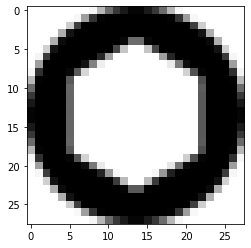

In [184]:
innensechskant = mpimg.imread('ImageDataset_folder/innensechskant 28x28_gray.png')
innensechskant = plt.imshow(innensechskant,cmap='gray')

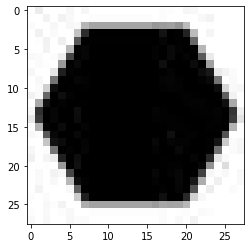

In [188]:
sechskant = mpimg.imread('ImageDataset_folder/sechskant 28x28_gray.jpg')
sechskant = plt.imshow(sechskant,cmap='gray')

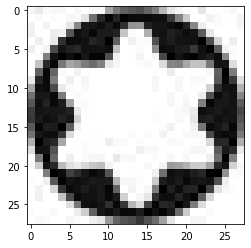

In [189]:
torx = mpimg.imread('ImageDataset_folder/torx 28x28_gray.jpg')
torx = plt.imshow(torx,cmap='gray')

Aus diesen Bildern wird nun ein Datensatz erzeugt. Die Bilder werden mit Hilfe des "Image Data Generators" transformiert, d.h durch Rotation, Zoom, Verschiebung werden neue Varianten der Bilder generiert.

In [3]:
import glob
import numpy as np
from PIL import Image
filelist = glob.glob("screwhead_img_for_gen/**/*")
X_raw = np.array([np.array(Image.open(fname)) for fname in filelist])
print(X_raw.shape)
print(len(filelist))

# Array erweitern
X_raw = X_raw.reshape(X_raw.shape + (1,))
print(X_raw.shape)

(5, 28, 28)
5
(5, 28, 28, 1)


## Labels erzeugen

Das Bilder Array **X_raw** wurde nun erstellt. Nun müssen noch die zugehörigen *Labels* erzeugt werden.

Folgende Ausgangssituationen sollen untersucht werden:
  1. Alle Bilder liegen in einem Ordner und jedes Bild besitzt Klassenname und Nummerierung im Dateinamen
  2. Jede Klasse in einem eigenen Ordner, Dateinamen benötigen lediglich eine fortlaufende Nummerierung


### Alle Bilder in einem Ordner

Die Labelliste muss dem Image-Array korrekt zugeordnet werden. Dafür müssen Bilder und zugehörige Labels in gleicher Reihenfolge abgespeichert werden.

In [7]:
import os
path = "ImageDataset_folder"
categories_raw = []  
for img in os.listdir(path):  # hole mir die Bezeichnung aus dem Dateinamen des Bildes, teile den Dateinamen am Leerzeichen (" ") und nutze den Klassennamen als Label
    if img.startswith("innensechskant"):
        category_, rand_str = img.split(' ') # teile auf in "innensechskant" und "28x28_gray"
        categories_raw.append(category_)# erweitere die Labelliste mit "innensechskant"
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("philips"):
        category_, rand_str = img.split(' ')
        categories_raw.append(category_)
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("pozidriv"):
        category_, rand_str = img.split(' ')
        categories_raw.append(category_)
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("sechskant"):
        category_, rand_str = img.split(' ')
        categories_raw.append(category_)
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("torx"):
        category_, rand_str = img.split(' ')
        categories_raw.append(category_)
        
y_raw=categories_raw
print(y_raw)

['innensechskant', 'philips', 'pozidriv', 'sechskant', 'torx']


sechskant


<function matplotlib.pyplot.show(close=None, block=None)>

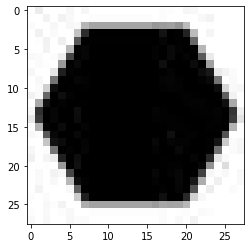

In [8]:
# Label Test
i=3
print(y_raw[i])
plt.imshow(X_raw[i],cmap='gray')
plt.show

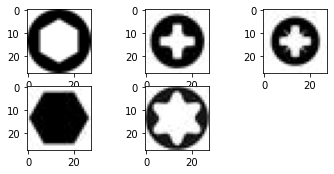

In [17]:
from matplotlib import pyplot

for i in range(5):
# define subplot
    pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
    pyplot.imshow(X_raw[i],cmap='gray')
# show the figure
pyplot.show()

### Bilderklassen in separatem Ordner

Die folgende Ordnerstruktur liegt vor:

main_directory/  
...category_a/  
......a_image_1.jpg  
......a_image_2.jpg  
...category_b/  
......b_image_1.jpg  
......b_image_2.jpg  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = 'C:/Users/Martin/OneDrive/Masterthesis_2022/01_Bilderdatenbank/ImageDataset_Classes'

CATEGORIES = ['innensechskant', 'philips', 'pozidriv', 'sechskant', 'torx']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break  
    break

In [ ]:
training_data = []
IMG_SIZE=28
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

In [ ]:
training_data[0].shape

In [ ]:
nrow = len(training_data)
ncol = len(training_data[0])
print('Reihen :', nrow)
print('Spalten :', ncol)

In [ ]:
nrow

In [ ]:
ncol

In [ ]:
for sample in training_data[:50]:
    print(sample[1])

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [179]:
X.shape

(55, 28, 28, 1)

In [181]:
len(y)

55

In [182]:
X[0].shape

(28, 28, 1)

### Datensatz mit Keras erzeugen und erweitern

Mit dem ImageDataGenerator aus dem Keras Paket *Image data preprocessing*, kann ein Datensatz erstellt werden.
Der Image Data Generator bietet eine Reihe nützlicher Funktionen um einen Datensatz aus Bildern zu erstellen und zu erweitern.

In [190]:
import tensorflow as tf
from tensorflow import keras

In [191]:
X = tf.keras.preprocessing.image_dataset_from_directory(
    'ImageDataset_Classes',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=123,
    validation_split=0.25,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 57 files belonging to 5 classes.
Using 14 files for validation.


In [192]:
class_names = X.class_names
print(class_names)

['innensechskant', 'philips', 'pozidriv', 'sechskant', 'torx']


## Generator ausprobieren und konfigurieren:

In [ ]:
#Generator config:
gen = ImageDataGenerator (
    width_shift_range=2,
    height_shift_range=2,
    rotation_range=10,
    #shear_range=0.01,
    #zoom_range=0.2,
    fill_mode='constant',cval=255 # beste fill mode bei einfarbigen Hintergrund
)
# generate one image:
for batch in gen.flow(
    X_raw,
    shuffle=False,
):
    #print(batch.shape)
    plt.imshow(batch[0],cmap='gray',vmin=0,vmax=255)
    plt.show
    break
    
print(batch.shape)

In [ ]:
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    brightness_range=None,
    shear_range=0,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=255,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)




itr = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=10,
    shuffle=False,
    seed=None,
    save_to_dir='Dataset_vid',
    #save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
    
    
#target_size=(img_width, img_height),
#batch_size=10,
#class_mode='categorical')

i=0

for i in range(0,3):
    X, y = itr.next()
    

In [ ]:
from numpy import save, load
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('Dataset_vid/X_train.npy', X_train)
save('Dataset_vid/y_train.npy', y_train)
save('Dataset_vid/X_test.npy', X_test)
save('Dataset_vid/y_test.npy', y_test)